In [5]:
################################################################################################################
#                                                                                                              #
#                                          Final  Project                                                      #
#                                           Lauren Urban                                                       #
#                                  AirBnB data for Chicago listings                                            #
#                         Source code: https://insideairbnb.com/get-the-data/                                  #
#                                                                                                              #
################################################################################################################

My goal in this wrangle was to determine...

1) Average Rental Price: Calculate the average price of listings in different neighborhoods of Chicago. This can help identify areas with higher or lower rental rates.

2) Price Distribution: Visualize the distribution of rental prices to understand the range of prices available in the market.

3) Listing count by neighborhood: Count the number of listings in each neighborhood to identify popular areas for Airbnb rentals.

4) Review Analysis: Analyzing number of ratings and average ratings score by host. 

5) Host earning potential: Determine the average amount each host is able to make with all of their properties rented out simultaneously.

About the data...

I used quarterly data for 2023 from InsideAirBnb.com and chose two datasets that I felt had the most relevant information and metrics while also having some intricacies that needed wrangled. 

In [6]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk as nltk

# Reading in my datasets

file_path1 = "/Users/laurenurban/Downloads/Final Project/chicagodatalong.csv"
file_path2 = "/Users/laurenurban/Downloads/Final Project/chicagodatashort.csv"

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Dropping columns the sets had in common to merge sets

df1.drop(columns=['price'], inplace=True)
df1.drop(columns=['host_id'], inplace=True)2
df1.drop(columns=['number_of_reviews'], inplace=True)

# Merging datasets 

merged_df = pd.merge(df1, df2, on='id',indicator=True)
display(merged_df)


id                                       listing_url  \
0                 1461451              https://www.airbnb.com/rooms/1461451   
1                 1502674              https://www.airbnb.com/rooms/1502674   
2                 1554433              https://www.airbnb.com/rooms/1554433   
3                    2384                 https://www.airbnb.com/rooms/2384   
4                 1562331              https://www.airbnb.com/rooms/1562331   
...                   ...                                               ...   
8944  1044986838764233788  https://www.airbnb.com/rooms/1044986838764233788   
8945  1045186641282805256  https://www.airbnb.com/rooms/1045186641282805256   
8946  1045430795416239989  https://www.airbnb.com/rooms/1045430795416239989   
8947  1045611315361653973  https://www.airbnb.com/rooms/1045611315361653973   
8948  1045650409760380671  https://www.airbnb.com/rooms/1045650409760380671   

         scrape_id last_scraped       source  \
0     2.023120e+13     12/18/23  city scrape   
1     2.023120e+13     12/18/23  city scrape   
2     2.023120e+13     12/18/23  city scrape   
3     2.023120e+13     12/18/23  city scrape   
4     2.023120e+13     12/18/23  city scrape   
...            ...          ...          ...   
8944  2.023120e+13     12/18/23  city scrape   
8945  2.023120e+13     12/18/23  city scrape   
8946  2.023120e+13     12/18/23  city scrape   
8947  2.023120e+13     12/18/23  city scrape   
8948  2.023120e+13     12/18/23  city scrape   

                                                 name_x  description  \
0     Rental unit in Chicago · ★4.60 · 1 bedroom · 1...          NaN   
1     Rental unit in Chicago · ★4.79 · 2 bedrooms · ...          NaN   
2     Bungalow in Chicago · ★4.85 · 1 bedroom · 1 be...          NaN   
3     Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...          NaN   
4     Rental unit in Chicago · 1 bedroom · 1 bed · 1...          NaN   
...                                                 ...          ...   
8944  Rental unit in Chicago · ★New · 3 bedrooms · 5...          NaN   
8945  Rental unit in Chicago · ★New · 1 bedroom · 1 ...          NaN   
8946  Home in Chicago · ★New · 2 bedrooms · 2 beds ·...          NaN   
8947  Rental unit in Chicago · ★New · 4 bedrooms · 6...          NaN   
8948  Condo in Chicago · ★New · 7 bedrooms · 7 beds ...          NaN   

                                  neighborhood_overview  \
0     We are in the far north neighborhood of Chicag...   
1     Old Town is the Historic District of Chicago. ...   
2     Beverly, South in Chicago where you'll find sa...   
3     The apartment is less than one block from beau...   
4     Northwest side of Chicago. The neighborhood is...   
...                                                 ...   
8944                                                NaN   
8945                                        River North   
8946  East Garfield Park is an area that is still ma...   
8947                                                NaN   
8948                                          West Town   

                                            picture_url  \
0     https://a0.muscache.com/pictures/da1a79e0-ac55...   
1     https://a0.muscache.com/pictures/e02e56c3-f683...   
2     https://a0.muscache.com/pictures/22698267/9b81...   
3     https://a0.muscache.com/pictures/acf6b3c0-47f2...   
4     https://a0.muscache.com/pictures/miso/Hosting-...   
...                                                 ...   
8944  https://a0.muscache.com/pictures/c3e92cf4-f481...   
8945  https://a0.muscache.com/pictures/miso/Hosting-...   
8946  https://a0.muscache.com/pictures/miso/Hosting-...   
8947  https://a0.muscache.com/pictures/miso/Hosting-...   
8948  https://a0.muscache.com/pictures/prohost-api/H...   

                                         host_url  ...  price  \
0       https://www.airbnb.com/users/show/2907254  ...   28.0   
1         https://www.airbnb.com/users/show/33004  ...  146.0   
2       https://www

1443873.0
Average Rental Price Overall: 173.1677860398177
Average price by neighborhood: neighbourhood_cleansed
Albany Park       128.400000
Archer Heights     85.333333
Armour Square     161.294118
Ashburn           127.428571
Auburn Gresham    126.960000
                     ...    
West Lawn          91.692308
West Pullman      146.090909
West Ridge        115.129630
West Town         221.084507
Woodlawn          103.968421
Name: price, Length: 77, dtype: float64


/var/folders/vl/sjvwd7x11yv72pmnnkq4yk7c0000gn/T/ipykernel_3370/2689564308.py:53: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


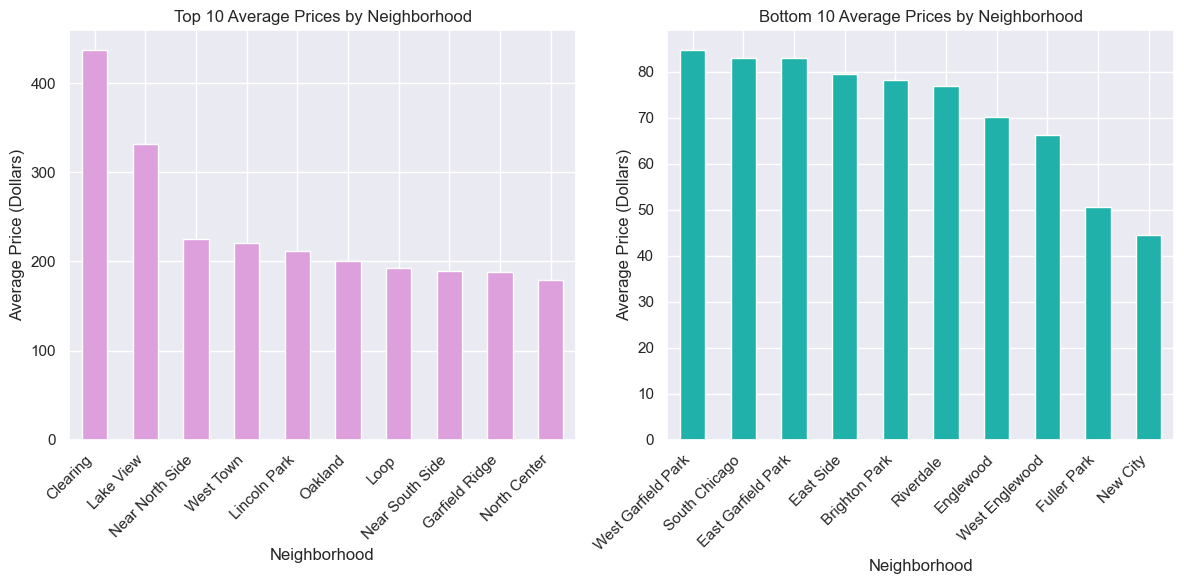

'This visualization shows us the highest average neighborhood is Clearing and when you look at the data, it is because the values primarily hover around $539 per night'

In [8]:
#1) Average rental price overall

# Excluding records with null values for 'price' for this calculation

average_rental_price = merged_df['price'].mean(skipna=True)
total = merged_df['price'].sum()
print(total)

print("Average Rental Price Overall:", average_rental_price)

invalid_prices = merged_df[merged_df['price'].isnull()]

# Function for average price by neighborhood

def get_average_price_by_neighborhood(df):
    
    df['price'] = df['price'].astype(float)
    
    average_price_by_neighborhood = df.groupby('neighbourhood_cleansed')['price'].mean()

    return average_price_by_neighborhood

if __name__ == "__main__":
    average_price_by_neighborhood = get_average_price_by_neighborhood(merged_df)
    print("Average price by neighborhood:", average_price_by_neighborhood)

# Visualization of price by neighborhood (bar chart)
    
sorted_average_price = average_price_by_neighborhood.sort_values()

# Since the data set has a lot of neighborhoods, I got the top 10 and bottom 10 values

top_10 = sorted_average_price.tail(10).sort_values(ascending = False)
bottom_10 = sorted_average_price.head(10).sort_values(ascending = False)
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_10.plot(kind='bar', color='plum')
plt.title('Top 10 Average Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 2, 2)
bottom_10.plot(kind='bar', color='lightseagreen')
plt.title('Bottom 10 Average Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Takeaway
'''This visualization shows us the highest average neighborhood is Clearing and when you look at the data, it is because the values primarily hover around $539 per night here.'''


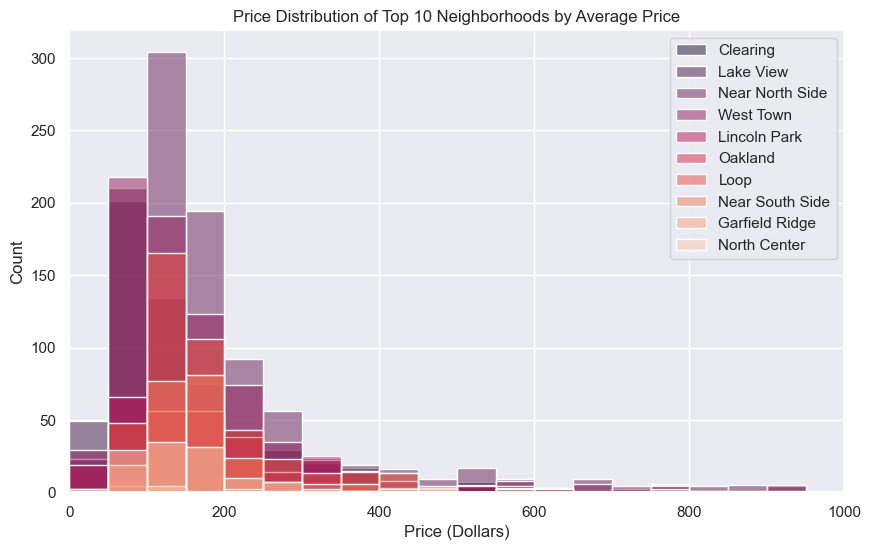

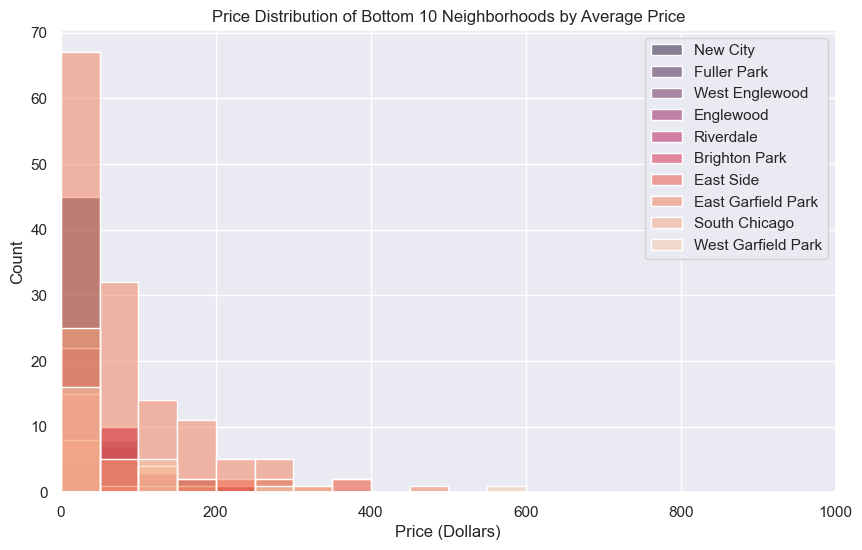

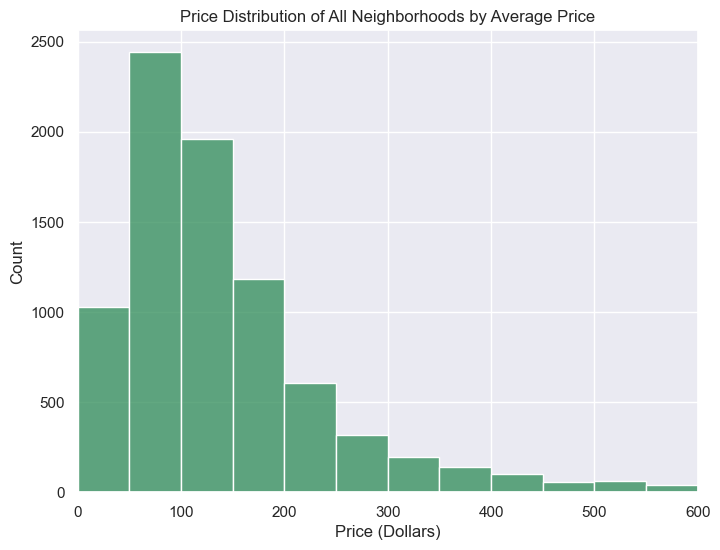

"The price distributions for both top 10 neighborhood's average price and all neighborhoods average price show a right skew. This is indicative of a wide range of listing prices with most on the lower end and a few outlying high values."

In [4]:
#2) Price distribution

# Overlaid histogram of top 10 priced neighborhoods

top_10_neighborhoods = merged_df.groupby('neighbourhood_cleansed')['price'].mean().nlargest(10).index

merged_df_top_10 = merged_df[merged_df['neighbourhood_cleansed'].isin(top_10_neighborhoods)]

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

custom_palette = sns.color_palette("rocket", len(top_10_neighborhoods))

# Following code adapted from https://www.geeksforgeeks.org/enumerate-in-python/
for i, neighborhood in enumerate(top_10_neighborhoods):
    sns.histplot(merged_df_top_10[merged_df_top_10['neighbourhood_cleansed'] == neighborhood]['price'],
                 bins=range(0, 1000, 50),
                 label=neighborhood,
                 alpha=0.5, # Set transparency for overlaid histograms
                 color=custom_palette[i])  

plt.title('Price Distribution of Top 10 Neighborhoods by Average Price')
plt.xlabel('Price (Dollars)')
plt.ylabel('Count')
plt.legend()
plt.xlim(0, 1000)
plt.show()

# Overlaid histogram of bottom 10 priced neighborhoods

bottom_10_neighborhoods = merged_df.groupby('neighbourhood_cleansed')['price'].mean().nsmallest(10).index

merged_df_bottom_10 = merged_df[merged_df['neighbourhood_cleansed'].isin(bottom_10_neighborhoods)]

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

custom_palette = sns.color_palette("rocket", len(bottom_10_neighborhoods))

for i, neighborhood in enumerate(bottom_10_neighborhoods):
    sns.histplot(merged_df_bottom_10[merged_df_bottom_10['neighbourhood_cleansed'] == neighborhood]['price'],
                 bins=range(0, 1000, 50),
                 label=neighborhood,
                 alpha=0.5, # Set transparency for overlaid histograms
                 color=custom_palette[i])  

plt.title('Price Distribution of Bottom 10 Neighborhoods by Average Price')
plt.xlabel('Price (Dollars)')
plt.ylabel('Count')
plt.legend()
plt.xlim(0, 1000)
plt.show()

# Price distribution histogram of price for all neighborhoods

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['price'], bins=range(0, 1000, 50), color='seagreen')
plt.title('Price Distribution of All Neighborhoods by Average Price')
plt.xlabel('Price (Dollars)')
plt.ylabel('Count')
plt.xlim(0, 600)  # Set the x-axis limits
plt.show()

# Takeaway 
'''The price distributions for all of the histograms produced show a right skew. This is indicative of a wide range of listing prices with most on the lower end and a few outlying high values.'''


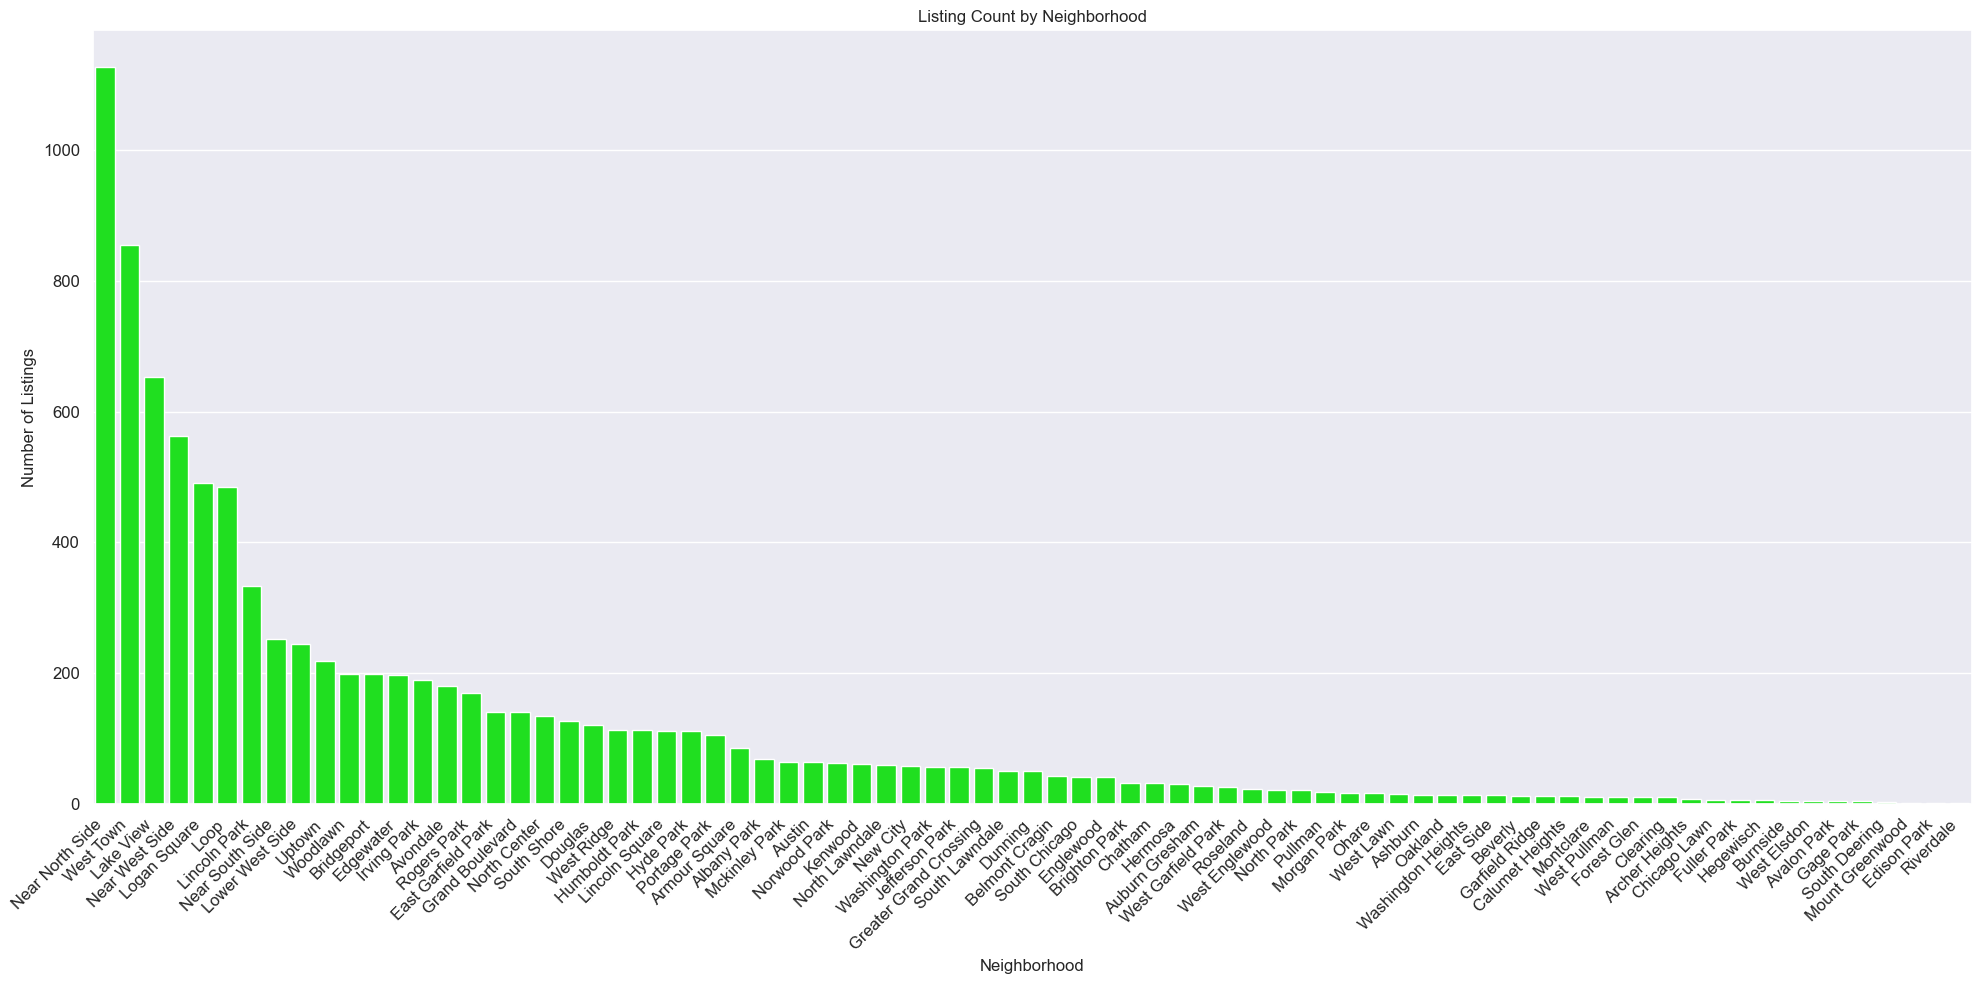

'Based on the plot above, Near North Side appears to have the highest listing count of all neighborhoods included while Riverdale has the fewest.'

In [200]:
#3) Visualization of listing count by neighborhood to identify popular areas

import seaborn as sns
import matplotlib.pyplot as plt

# Got the count of listings in each neighborhood
listing_count_by_neighborhood = merged_df['neighbourhood_cleansed'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x=listing_count_by_neighborhood.index, y=listing_count_by_neighborhood.values, color='lime')
plt.title('Listing Count by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
plt.tight_layout()
plt.show()

# Takeaway
'''Based on the plot above, Near North Side appears to have the highest listing count of all neighborhoods included while Riverdale has the fewest.'''


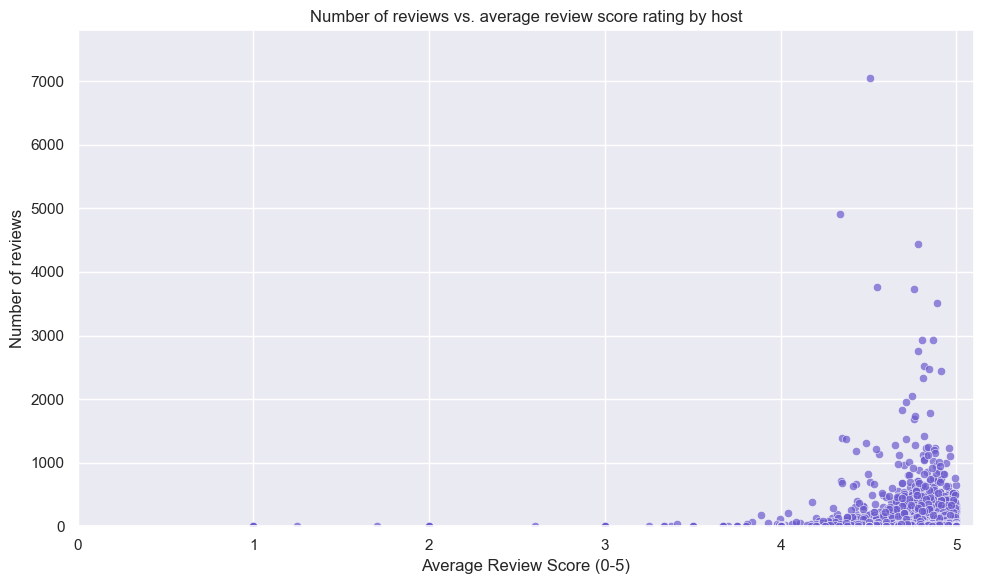

'To determine which host has the overall best rating, we plotted number of reviews against average review score. For example, subjectively a host with 5000 reviews that are 4 stars on average is better than someone with 5 reviews and a 5 star rating due to consistency of scoring.'

In [226]:
#4) Analyzed the number of reviews and average score rating by host

# Grouped by host id and calculated the mean of price and review score rating

host_avg_df = merged_df.groupby('host_id').agg({'number_of_reviews': 'sum', 'review_scores_rating': 'mean'})

# Renamed the columns for clarity
host_avg_df.columns = ['avg_number_of_reviews', 'avg_rating']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=host_avg_df, x='avg_rating', y='avg_number_of_reviews', color='slateblue',alpha=0.7)

plt.xlim(0, 5.1)
plt.ylim(0, 7800)
plt.title('Number of reviews vs. average review score rating by host')
plt.xlabel('Average Review Score (0-5)')
plt.ylabel('Number of reviews')
plt.tight_layout()
plt.show()

# Analysis
'''To determine which host has the overall best rating, we plotted number of reviews against average review score. For example, subjectively a host with 5000 reviews that are 4 stars on average is better than someone with 5 reviews and a 5 star rating due to consistency of scoring.'''

In [253]:
#5)  Determine the average amount a host is able to make with all of their properties rented out simultaneously.

# Grouped by host id and calculated the sum of prices
host_price_sum = merged_df.groupby('host_id')['price'].sum()
host_price_sum_df = host_price_sum.reset_index(name='sum_of_average_price')

# Set the blank column name to 'host_id'
host_price_sum_df = host_price_sum_df.rename(columns={'': 'host_id'})

host_price_sum_df = host_price_sum_df.sort_values(by='sum_of_average_price',ascending = False)

display(host_price_sum_df)

# Analysis
'''The assumption about observations with zero as the average amount a host can make with all properties rented is that there were missing values for price in the data. On average, the more properties a host has the higher their earning potential, excluding outliers (i.e. one host has a property for $1000 a night).'''


host_id  sum_of_average_price
2598  188216209               99998.0
2059  107434423               81899.0
937    25138314               42871.0
2871  248760412               29687.0
3328  395498979               14905.0
...         ...                   ...
1331   43831440                   0.0
1325   43446278                   0.0
2917  260438670                   0.0
1310   42645017                   0.0
3071  310786205                   0.0

[3992 rows x 2 columns]

'The assumption about observations with zero as the average amount a host can make with all properties rented is that there were missing values for price in the data. On average, the more properties a host has the higher their earning potential, excluding outliers (i.e. one host has a property for $1000 a night).'

What comes next? 

While I was doing this wrangle/analysis, I was thinking about how it could be meaningful to compare these values to data from New York or Los Angeles or another city to make comparisons.